In [1]:
#Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Library to help with statistical analysis
from scipy.stats import chi2_contingency
import scipy
import scipy.stats as stats

In [3]:
#Read the csv file from local path
#Dataframe name as df
#print("-Read CSV")
data=pd.read_csv("abtest.csv")
df = pd.DataFrame(data)
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [4]:
#Get first 5 data value from dataframe

dfHead = df.head()
dfHead

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
#Get last 5 data value from dataframe

dfTail = df.tail()
dfTail

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
#Get the number of rows and columns it contains
print("-Dataframe Shape")
dfSize = df.shape
print("The number of rows are - ",dfSize[0],"\nThe number of columns are -",dfSize[1])

-Dataframe Shape
The number of rows are -  100 
The number of columns are - 6


In [7]:
#Checking the data types of the columns for the dataset
print("-AB Test dataframe info")
dfInfo = df.info()
dfInfo

-AB Test dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
#Get missing data count from dataframe
#Previous result shown as non null for all the columns so this is not needed
#but to check any missing data in the dataframe

 #dfNa = df.isna()
 #dfNaSum = dfNa.sum()
 #dfNaSum

In [9]:
#df = df.dropna() # drops all missing values in the data if any

In [10]:
#Get All columns
df.columns

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

In [11]:
# Update mapping based on unique values
df['converted']

0      no
1     yes
2      no
3      no
4     yes
     ... 
95     no
96    yes
97    yes
98    yes
99    yes
Name: converted, Length: 100, dtype: object

In [12]:
# Assuming your data is in a DataFrame named df
# Filter data into control and treatment groups

control_group = df[df['group'] == 'control']
treatment_group = df[df['group'] == 'treatment']

# Calculate descriptive statistics for each group
control_stats = control_group['time_spent_on_the_page'].describe()
treatment_stats = treatment_group['time_spent_on_the_page'].describe()

# Print or display the statistics
print("Control Group Statistics:")
print(control_stats)

print("\nTreatment Group Statistics:")
print(treatment_stats)

Control Group Statistics:
count    50.000000
mean      4.532400
std       2.581975
min       0.190000
25%       2.720000
50%       4.380000
75%       6.442500
max      10.300000
Name: time_spent_on_the_page, dtype: float64

Treatment Group Statistics:
count    50.000000
mean      6.223200
std       1.817031
min       1.650000
25%       5.175000
50%       6.105000
75%       7.160000
max      10.710000
Name: time_spent_on_the_page, dtype: float64


In [13]:
# Convert 'converted' column to binary for easier analysis
dfcon = df.copy()
dfcon['converted'] = dfcon['converted'].map({'yes': 1, 'no': 0})

# Group by landing_page and calculate the number of conversions
conversion_counts = dfcon.groupby('landing_page')['converted'].sum()

# Calculate total counts for each landing page
total_counts = dfcon['landing_page'].value_counts()

# Create a report
report = pd.DataFrame({
    'Landing Page': conversion_counts.index,
    'Converted': conversion_counts.values,
    'Not Converted': total_counts.values - conversion_counts.values,
    'Total Users': total_counts.values
})

print(report)

  Landing Page  Converted  Not Converted  Total Users
0          new         33             17           50
1          old         21             29           50


In [14]:
#Print the mean on time_spent_on_the_page

dfDataMean = df["time_spent_on_the_page"].mean()
dfDataMean

5.377800000000001

In [15]:
#Print the mode on time_spent_on_the_page
dfDataMode = df["time_spent_on_the_page"].mode()
dfDataMode

0    0.40
1    3.88
2    4.75
3    5.86
4    6.04
5    7.16
Name: time_spent_on_the_page, dtype: float64

In [16]:
#Print the median on time_spent_on_the_page
dfDataMedian = df["time_spent_on_the_page"].median()
dfDataMedian

5.415

In [17]:
#Print the Quantile 25%
dfDataQ1 = df["time_spent_on_the_page"].quantile(q=0.25)
dfDataQ1

3.88

In [18]:
#Print the Quantile 50%
dfDataQ2 = df["time_spent_on_the_page"].quantile(q=0.75)
dfDataQ2

7.0225

In [19]:
#IQR Value of Time spent on the any page
#75% - 25%
dfIQR = dfDataQ2 - dfDataQ1
dfIQR

3.1425

In [20]:
# Filter the DataFrame where landing_page is 'old' and get the count
count_old = df[df['landing_page'] == 'old'].shape[0]

# Filter the DataFrame where landing_page is 'new' and get the count
count_new = df[df['landing_page'] == 'new'].shape[0]

print("The number of old landing_page - ", count_old, "\nThe number of new landing_page -", count_new)

The number of old landing_page -  50 
The number of new landing_page - 50


In [21]:
# Filter the DataFrame where landing_page is 'old' with total time spent
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'].sum()

# Filter the DataFrame where landing_page is 'new' with total time spent
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page'].sum()

print("The total time spent on old landing_page - ", time_spent_old, "\n and time_spent_new on new landing_page -", time_spent_new)

The total time spent on old landing_page -  226.62000000000003 
 and time_spent_new on new landing_page - 311.16


In [22]:
# Filter the DataFrame where landing_page is 'old' with converted
converted_old = df[(df['landing_page'] == 'old') & (df['converted'] == 'yes')].shape[0]

# Filter the DataFrame where landing_page is 'new' with converted
converted_new = df[(df['landing_page'] == 'new') & (df['converted'] == 'yes')].shape[0]

print("The total converted on",count_old,"old landing_page - ", converted_old, "\n and converted on",count_new,"new landing_page -", converted_new)

The total converted on 50 old landing_page -  21 
 and converted on 50 new landing_page - 33


In [23]:
#Check Dataframe through describe command
dfDescribe = df.describe()
dfDescribe

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [24]:
time_spent_stats = df['time_spent_on_the_page'].describe()
time_spent_stats

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

In [25]:
#include="all" will give summary of all the categorical and numerical variables 
dfDescribeAll = df.describe(include="all").T 
dfDescribeAll

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#include="object" will give summary
dfDescribeIncludeObject = df.describe(include="object")
dfDescribeIncludeObject

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


Range, Variance, Standard deviation

In [27]:
dataRange = round(df['time_spent_on_the_page'].max() - df['time_spent_on_the_page'].min(),2)
dataRange

10.52

In [28]:
dataVar=round(df['time_spent_on_the_page'].var(),2)
dataVar

5.66

In [29]:
dataStdDev = round(df['time_spent_on_the_page'].std(),2)
dataStdDev

2.38

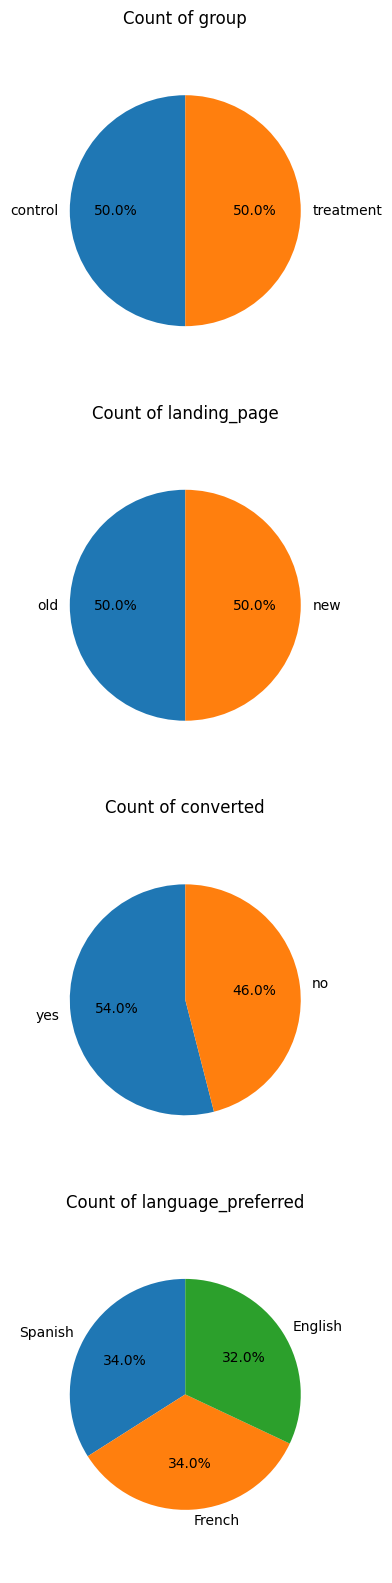

In [30]:
# Filter out non-categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

# Plotting a pie chart for each categorical column
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(4, 4 * len(categorical_columns)))

for i, column in enumerate(categorical_columns):
    labels = df[column].value_counts().index
    sizes = df[column].value_counts().values
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Count of {column}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

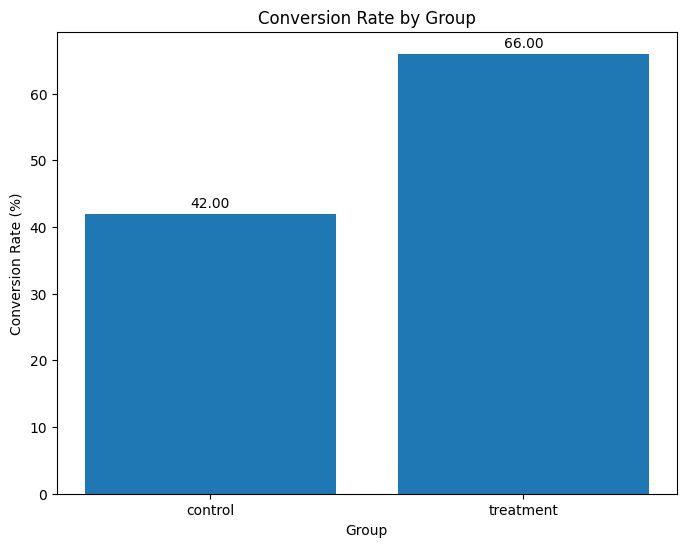

In [31]:
#Plot the conversion rate based upon the group
# Calculate conversion rates for each group
conversion_rate = df.groupby('group')['converted'].apply(lambda x: (x == 'yes').mean() * 100)

# Create a bar plot with exact numbers displayed
plt.figure(figsize=(8, 6))
bars = plt.bar(conversion_rate.index, conversion_rate.values)
plt.xlabel('Group')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Group')

# Display exact numbers on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

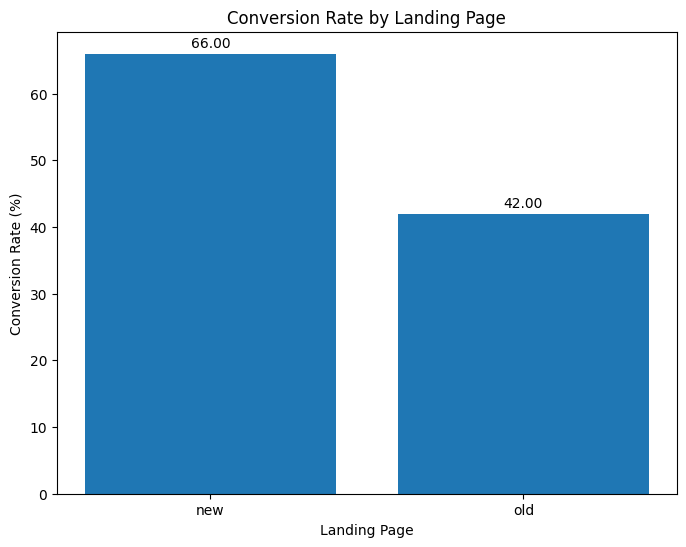

In [32]:
# Calculate conversion rates for each landing page
conversion_rate = df.groupby('landing_page')['converted'].apply(lambda x: (x == 'yes').mean() * 100)

# Create a bar plot with exact numbers displayed
plt.figure(figsize=(8, 6))
bars = plt.bar(conversion_rate.index, conversion_rate.values)
plt.xlabel('Landing Page')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Landing Page')

# Display exact numbers on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

Histplot on new landing page
Skewness of 'time_spent_on_the_page' for new landing page: 0.26


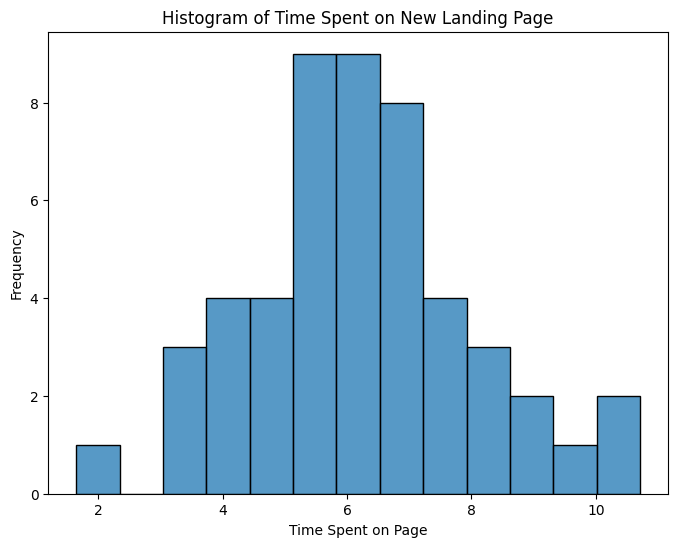

In [33]:
#Histplot on new landing page
print("Histplot on new landing page")
# Calculate skewness for the 'time_spent_on_the_page' column in the new landing page data
skewness = df[df['landing_page'] == 'new']['time_spent_on_the_page'].skew()

print(f"Skewness of 'time_spent_on_the_page' for new landing page: {skewness:.2f}")

# Create a histogram plot for the new landing page
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['landing_page'] == 'new'], x='time_spent_on_the_page', binwidth=0.7)
plt.xlabel('Time Spent on Page')
plt.ylabel('Frequency')
plt.title('Histogram of Time Spent on New Landing Page')
plt.show()

Histplot on old landing page
Skewness of 'time_spent_on_the_page' for old landing page: 0.18


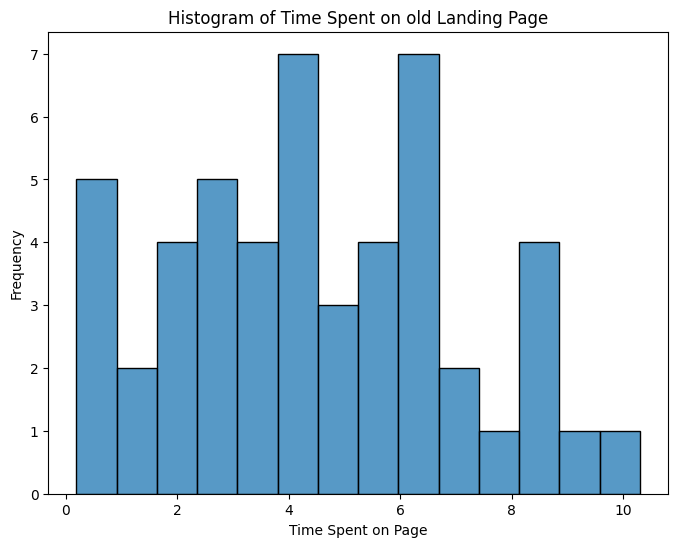

In [34]:
#Histplot on old landing page
print("Histplot on old landing page")
# Calculate skewness for the 'time_spent_on_the_page' column in the old landing page data
skewness = df[df['landing_page'] == 'old']['time_spent_on_the_page'].skew()

print(f"Skewness of 'time_spent_on_the_page' for old landing page: {skewness:.2f}")

# Create a histogram plot for the old landing page
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['landing_page'] == 'old'], x='time_spent_on_the_page', binwidth=0.7)
plt.xlabel('Time Spent on Page')
plt.ylabel('Frequency')
plt.title('Histogram of Time Spent on old Landing Page')
plt.show()

<Figure size 800x600 with 0 Axes>

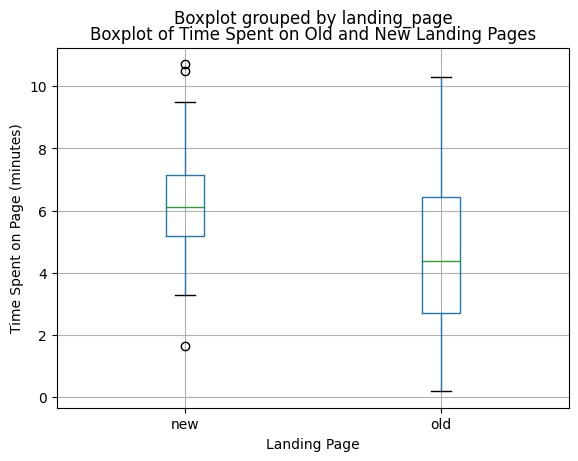

In [35]:
plt.figure(figsize=(8, 6))
df.boxplot(column='time_spent_on_the_page', by='landing_page')
plt.title('Boxplot of Time Spent on Old and New Landing Pages')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on Page (minutes)')
plt.show()

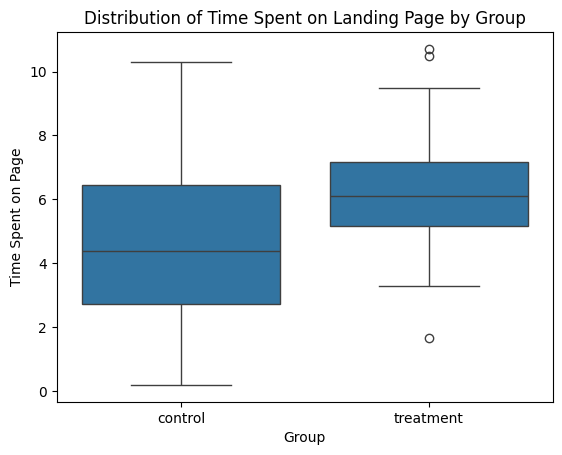

In [36]:
sns.boxplot(x='group', y='time_spent_on_the_page', data=df)
plt.xlabel('Group')
plt.ylabel('Time Spent on Page')
plt.title('Distribution of Time Spent on Landing Page by Group')
plt.show()

Sample mean = 5.38


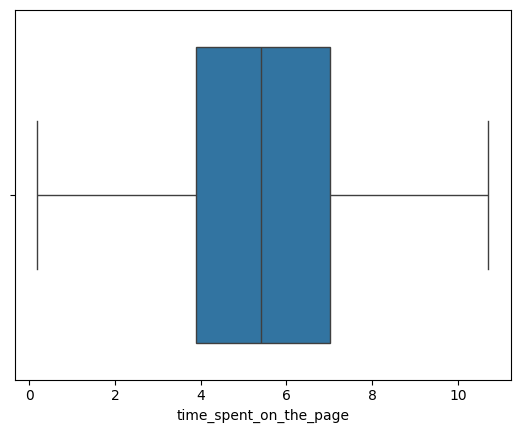

In [37]:
# Visual analysis of the distribution of the time spent by people in accessing the landing_page
sns.boxplot(x="time_spent_on_the_page", data = df)
print('Sample mean =',round(df['time_spent_on_the_page'].mean(),2))
plt.show()

In [38]:
#Load data using Pandas
data=pd.read_csv("abtest.csv")
df = pd.DataFrame(data)

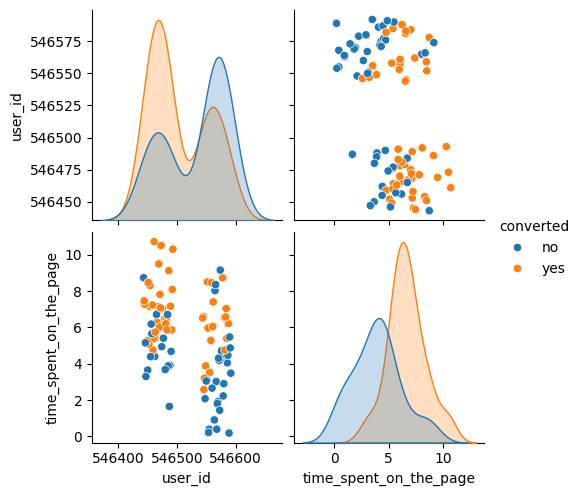

In [39]:
# Relationships between variables
sns.pairplot(df, hue='converted')
plt.show()

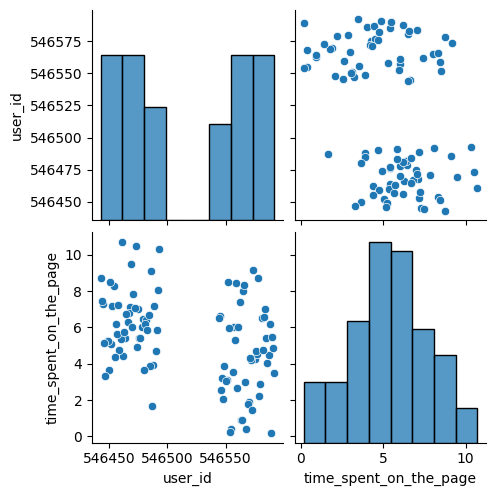

In [40]:
#Plot pair plot
sns.pairplot(df)

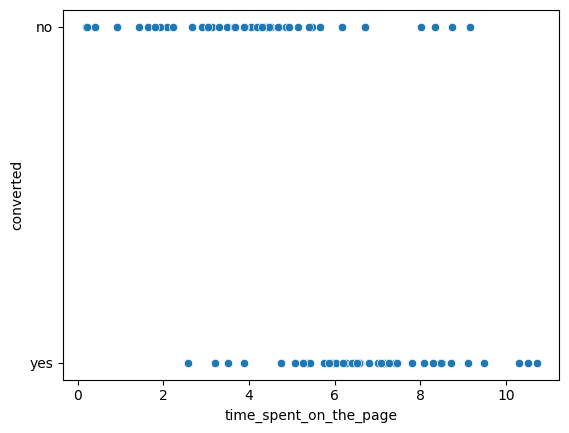

In [41]:
# Relationships between variables
sns.scatterplot(x='time_spent_on_the_page', y='converted', data=df)
plt.show()

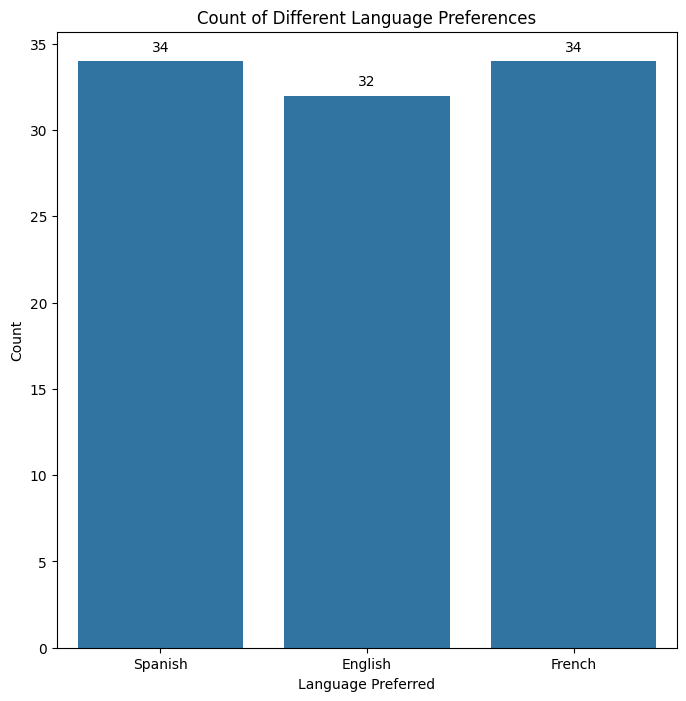

In [42]:
# Distribution of categorical data
# print("Different language preferred Count in 100 users")
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='language_preferred', data=df)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xlabel('Language Preferred')
plt.ylabel('Count')
plt.title('Count of Different Language Preferences')
plt.show()

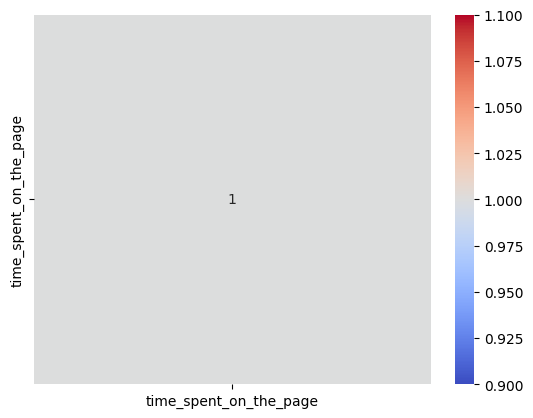

In [43]:
# Correlation analysis (if applicable)
sns.heatmap(df[['time_spent_on_the_page']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [44]:
# get the z-score of every value with respect to their columns
z = np.abs(round(stats.zscore(df['time_spent_on_the_page']),2))   
print(z)

0     0.80
1     0.74
2     0.41
3     1.00
4     0.27
      ... 
95    0.10
96    0.48
97    0.72
98    0.35
99    0.20
Name: time_spent_on_the_page, Length: 100, dtype: float64


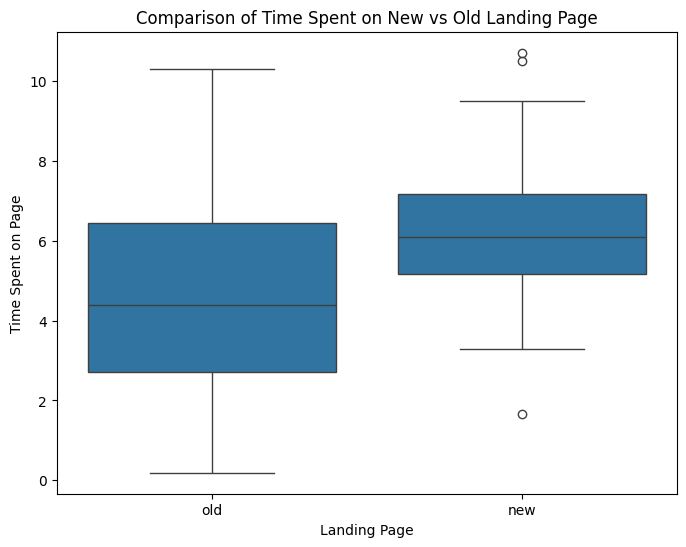

In [45]:
# Filter data for new and old landing pages
time_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df)
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on Page')
plt.title('Comparison of Time Spent on New vs Old Landing Page')
plt.show()

In [46]:
# The test to be performed is t-test
# Separate time data for new and old landing pages
# Extract time spent data for new and old landing pages
time_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# Perform one-tailed t-test assuming unequal variances
t_stat, p_value = stats.ttest_ind(time_new, time_old, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Print t-statistic and p-value
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Compare p-value to alpha and write inference
if p_value < alpha:
    print("Reject null hypothesis: Mean time spent on the new landing page is greater than the old landing page.")
else:
    print("Fail to reject null hypothesis: Mean time spent on the new landing page is not greater than the old landing page.")


T-Statistic: 3.79
P-value: 0.0003
Reject null hypothesis: Mean time spent on the new landing page is greater than the old landing page.


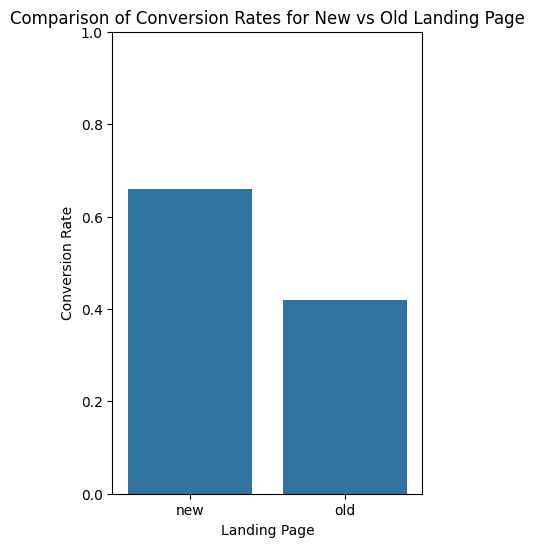

In [47]:
# Conversion Rates for New vs Old Landing Page
dfcon = df.copy()
dfcon['converted'] = dfcon['converted'].map({'yes': 1, 'no': 0})

# Filter data for new and old landing pages
conversion_rates = dfcon.groupby('landing_page')['converted'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(4, 6))
sns.barplot(x='landing_page', y='converted', data=conversion_rates)
plt.xlabel('Landing Page')
plt.ylabel('Conversion Rate')
plt.title('Comparison of Conversion Rates for New vs Old Landing Page')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for conversion rate
plt.show()

In [48]:
# Convert 'converted' column to binary for easier analysis
dfcon = df.copy()
dfcon['converted'] = dfcon['converted'].map({'yes': 1, 'no': 0})

# Converted data for new and old landing page
all_new=dfcon[dfcon['landing_page'] == 'new']
all_old=dfcon[dfcon['landing_page'] == 'old']

# Filter data for new and old landing pages where converted == 1 (converted users)
converted_new = dfcon[(dfcon['landing_page'] == 'new') & (dfcon['converted'] == 1)]
converted_old = dfcon[(dfcon['landing_page'] == 'old') & (dfcon['converted'] == 1)]

# Calculate conversion rates
conversion_rate_new = len(converted_new) / len(all_new)
conversion_rate_old = len(converted_old) / len(all_old)

# Perform one-tailed z-test
z_score = (conversion_rate_new - conversion_rate_old) / ((conversion_rate_new * (1 - conversion_rate_new) / len(all_new)) + (conversion_rate_old * (1 - conversion_rate_old) / len(all_old)))**0.5
p_value = 1 - stats.norm.cdf(z_score)

# Set significance level (alpha)
alpha = 0.05

# Print z-score and p-value
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

# Compare p-value to alpha and write inference
if p_value < alpha:
    print("Reject null hypothesis: Conversion rate for the new landing page is greater than the old landing page.")
else:
    print("Fail to reject null hypothesis: Conversion rate for the new landing page is not greater than the old landing page.")



Z-score: 2.48
P-value: 0.0066
Reject null hypothesis: Conversion rate for the new landing page is greater than the old landing page.


In [49]:
preferredLanguage = pd.crosstab(index=df["language_preferred"],  # Make a crosstab
                     columns="count")                  # Name the count column
preferredLanguage

col_0,count
language_preferred,
English,32
French,34
Spanish,34


In [50]:
# Data categorized on the basis of language preferrences 
dfCount_LanguagePref = df.groupby('language_preferred')['converted'].value_counts()
dfCount_LanguagePref

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: count, dtype: int64

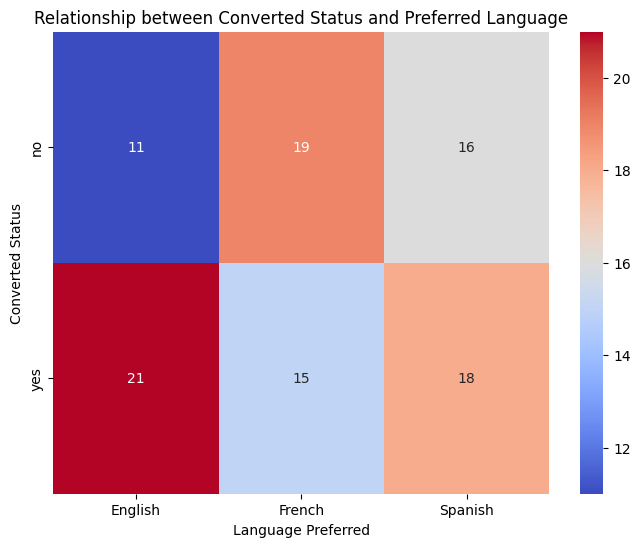

In [51]:
# Create a contingency table
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Language Preferred')
plt.ylabel('Converted Status')
plt.title('Relationship between Converted Status and Preferred Language')
plt.show()

In [52]:
# Create a contingency table
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

# Perform chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Set significance level (alpha)
alpha = 0.05

# Print results
print(f"Chi-squared statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print("\n")
print("From the result set we conclude that -")
# Compare p-value to significance level
if p_value < alpha:
    print("Reject null hypothesis: Converted status depends on preferred language.")
else:
    print("Fail to reject null hypothesis: Converted status does not depend on preferred language.")


Chi-squared statistic: 3.09
P-value: 0.2130


From the result set we conclude that -
Fail to reject null hypothesis: Converted status does not depend on preferred language.


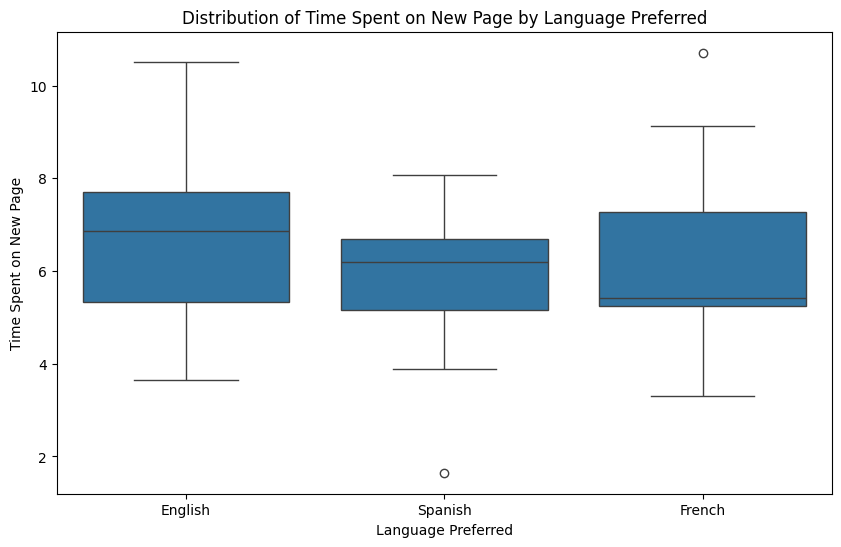

In [53]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=df[df['landing_page'] == 'new'])
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on New Page')
plt.title('Distribution of Time Spent on New Page by Language Preferred')
plt.show()


In [54]:
# Extract time spent data for each language group on the new landing page
time_english = df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'English')]['time_spent_on_the_page']
time_spanish = df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'Spanish')]['time_spent_on_the_page']
time_french = df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'French')]['time_spent_on_the_page']

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(time_english, time_spanish, time_french)

# Set significance level (alpha)
alpha = 0.05

# Print results
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Compare p-value to significance level
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in time spent among different language users.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in time spent among different language users.")

F-statistic: 0.85
P-value: 0.4320
Fail to reject null hypothesis: There is no significant difference in time spent among different language users.
